# Investigating Suicide Rates Overview 1985 to 2016.

In this analysis I will be focusing at investigating factors that could influence suicide rates among different user cohorts and countries.

The dataset includes info on suicide rates among different cohorts together with the country, region and country economical status. This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/601526/opt/anaconda3

  added / updated specs:
    - nbconvert


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py37_0           6 KB  anaconda
    alabaster-0.7.12           |           py37_0          17 KB  anaconda
    anaconda-client-1.7.2      |           py37_0         140 KB  anaconda
    anaconda-project-0.8.4     |             py_0         215 KB  anaconda
    applaunchservices-0.2.1    |             py_0           9 KB  anaconda
    appnope-0.1.0              |           py37_0           8 KB  anaconda
    appscript-1.1.1            |   py37haf1e3a3_0         134 KB  anaconda
    argh-0.26.2                |           py37_0          36 KB  anaconda
    argon2-cffi-20.1.0         |   py37haf1e3a3_1          47 KB  anaconda
    asn1crypto-1.4.0           |      

snowballstemmer-2.0. | 58 KB     | ##################################### | 100% 
sip-4.19.24          | 259 KB    | ##################################### | 100% 
krb5-1.18.2          | 1.2 MB    | ##################################### | 100% 
toolz-0.11.1         | 47 KB     | ##################################### | 100% 
curl-7.71.1          | 143 KB    | ##################################### | 100% 
libedit-3.1.20191231 | 102 KB    | ##################################### | 100% 
pyrsistent-0.17.3    | 87 KB     | ##################################### | 100% 
libarchive-3.4.2     | 1.6 MB    | ##################################### | 100% 
xz-5.2.5             | 282 KB    | ##################################### | 100% 
msgpack-python-1.0.0 | 87 KB     | ##################################### | 100% 
astropy-4.0.2        | 7.5 MB    | ##################################### | 100% 
pkginfo-1.6.0        | 41 KB     | ##################################### | 100% 
packaging-20.4       | 35 KB

parso-0.5.2          | 69 KB     | ##################################### | 100% 
mock-4.0.2           | 31 KB     | ##################################### | 100% 
backports-1.0        | 139 KB    | ##################################### | 100% 
ruamel_yaml-0.15.87  | 241 KB    | ##################################### | 100% 
intel-openmp-2020.2  | 1.2 MB    | ##################################### | 100% 
pycodestyle-2.6.0    | 41 KB     | ##################################### | 100% 
zope.interface-5.1.2 | 292 KB    | ##################################### | 100% 
json5-0.9.5          | 22 KB     | ##################################### | 100% 
sphinxcontrib-websup | 34 KB     | ##################################### | 100% 
gevent-20.9.0        | 1.6 MB    | ##################################### | 100% 
gsl-2.4              | 2.7 MB    | ##################################### | 100% 
sqlalchemy-1.3.19    | 1.8 MB    | ##################################### | 100% 
scikit-image-0.17.2  | 10.2 

In [2]:
os.getcwd()
#changing work directory
os.chdir('/Users/601526/Documents/Python/uda_ndgr/assignment5/suicide_investigations')

In [3]:
df = pd.read_csv('master.csv')

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Main subject for analysis

In this analysis my primary focus is to investigate factors that could possibly influence suicide rates, as well as to get some insight on suicide rates among different generations and genders, as well as to discover some general trends.

To do this, at first I will investigate the most recent data on suicide rates among different countries to discover possible patterns, and later will focus on trends comparison of suicide rates per 100k population within different generations and gender.

The primary focus for the analysis will be around universal suicide ratio of the number of suicides per 100k population. 

This metric is taken as a centralised object of analysis as it is independent from population size and therefore will be more objective in representing general trends.

## Univariate Exploration


In [5]:
#Let's have a look at the overall structure of the dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#How many countries are present in the dataset?
df['country'].nunique()

101

In total, there's a range of observations for 101 country for the period of 31 years, which is really impressive.

From here if we look at max and min numbers, we can already spot that suicides number has values close to zero, as well as its maximum value of 22,338. Let's investigate this value a bit closer.

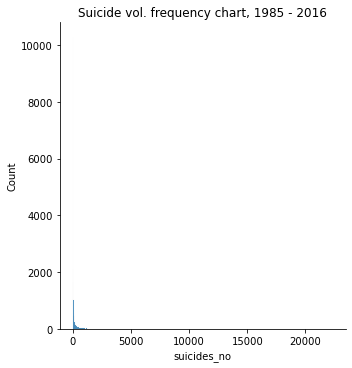

In [7]:
sns.displot(df, x = 'suicides_no');
plt.title('Suicide vol. frequency chart, 1985 - 2016');

The plot immediately shows that the majority of suicides are sitting somewhere within the range of approx. 2,000. Let's have a closer look at values < 5000 and below 2500 to confirm.

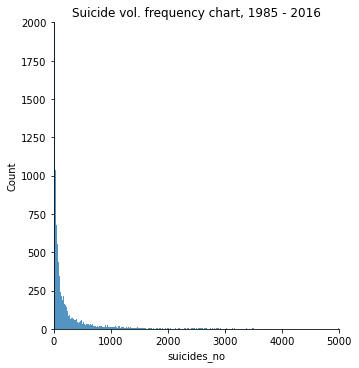

In [8]:
sns.displot(df, x = 'suicides_no');
plt.xlim(0,5000);
plt.ylim(0, 2000);
plt.title('Suicide vol. frequency chart, 1985 - 2016');

From here, we can already see that the majority of suicide volumes are sitting somewhere 500. Considering that 0 would be the most frequent number, I would like to investigate row having max value to see if it can be excluded.

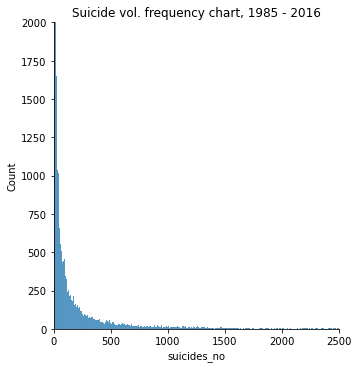

In [9]:
sns.displot(df, x = 'suicides_no');
plt.xlim(0,2500);
plt.ylim(0,2000);
plt.title('Suicide vol. frequency chart, 1985 - 2016');

In [10]:
df.query('suicides_no == 22338')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers


According to Russian wikipedia and Guardian - https://www.theguardian.com/world/2003/jul/09/russia.nickpatonwalsh#:~:text=The%20peak%20of%20recorded%20suicides,to%2054%2Dyear%2Dolds.&text=Women%20became%20the%20first%20victim%20of%20market%20reforms.%22, year 1994 recorded peak in suicides where 41.1 people killed themselves in every 100,000 of population. Therefore, this outlier is trustworthy.

Let's look at boxplots and density distribution

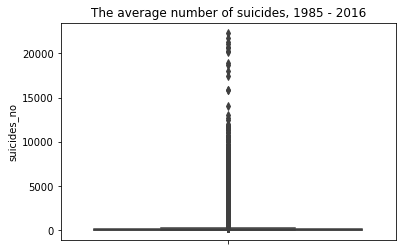

In [11]:
sns.boxplot(y = 'suicides_no', data = df);
plt.title('The average number of suicides, 1985 - 2016');

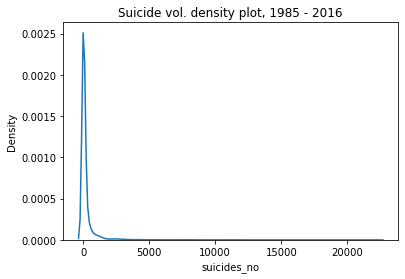

In [12]:
sns.kdeplot(df['suicides_no']);
plt.title('Suicide vol. density plot, 1985 - 2016');

The given data has very long tail on the number of suicides preliminary driven by high granularity of the dataset (data is given per country per generation). Let's see if re-aggregating the data by country and year would give us more meaningful result.

In [13]:
#renaming columns
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation']

#building aggregated dataframe for investigation
df_country = df[['country','year', 'population','suicides_no']].groupby(by=['country', 'year']).sum().reset_index()

#adding suicides per 100k pop
df_country['suicides_per_100k'] = df_country.suicides_no / df_country.population * 100000
df['gdp_for_year_dollars'] = df['gdp_for_year_dollars'].str.replace(',','').astype(int)
df_country.head()

,country,year,population,suicides_no,suicides_per_100k
0,Albania,1987,2709600,73,2.694125
1,Albania,1988,2764300,63,2.279058
2,Albania,1989,2803100,68,2.425886
3,Albania,1992,2822500,47,1.665190
4,Albania,1993,2807300,73,2.600363


Let's revisit the metric after the transformation to see if more meaningful picture can be discovered.

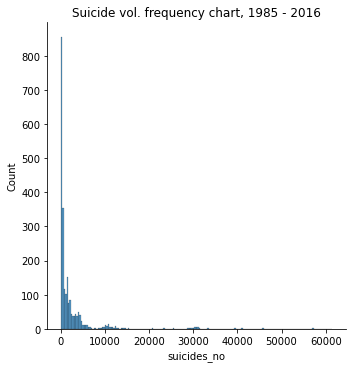

In [14]:
sns.displot(df_country, x = 'suicides_no');
plt.title('Suicide vol. frequency chart, 1985 - 2016');

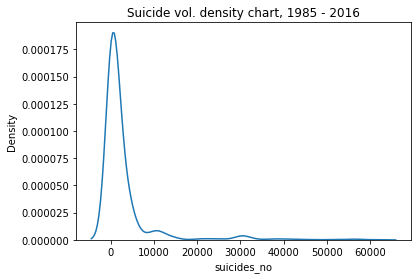

In [15]:
sns.kdeplot(df_country['suicides_no']);
plt.title('Suicide vol. density chart, 1985 - 2016');

The above chart makes way more sense with the majority of annual suicides per country sitting somewhere within the range below 10,000 cases. However, there is a long tail of suicides that lasts up until 60,000 cases.

Another interesting thing to notice are two peaks within the range of 10k-15k annual suicides and an area within the range of 30k-35k.

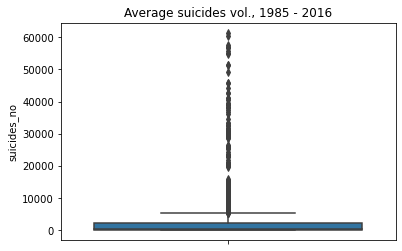

In [16]:
sns.boxplot(data = df_country, y = 'suicides_no');
plt.title('Average suicides vol., 1985 - 2016');

The above chart doesn't give much sense due to many outliers sitting above ~8k suicides per year, which we can investigate later. 

Let's look at the boxplot body a bit closer to understand the average world figure a bit better.

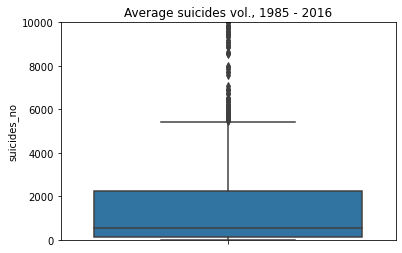

In [17]:
sns.boxplot(data = df_country, y = 'suicides_no')
plt.ylim(0, 10000);
plt.title('Average suicides vol., 1985 - 2016');

Above picture is way more optimistic.

Despite the number of outliers, the average aggregated picture is reassuring. 50% of all suicide numbers within the given number of countries and date ranges will be sitting below 1,000 people, and 75% of the whole dataset is below 2000, with the majority of 101 countries across 31 year of observations is sitting below 6,000 suicides per annum.

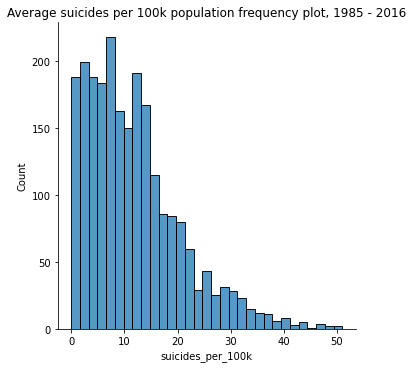

In [18]:
sns.displot(data = df_country, x = 'suicides_per_100k');
plt.title('Average suicides per 100k population frequency plot, 1985 - 2016');

The world's average suicides per 100k population across 31 year would be sitting somewhere within 10 suicides per 100k population. Overall, the dataset is heavily skewed to the right having non-normal distribution.

Together, after the investigation we can categorize outliers as countries having > 6000 suicides per year or over 31 suicide cases per 100k population. Let's review those in details.

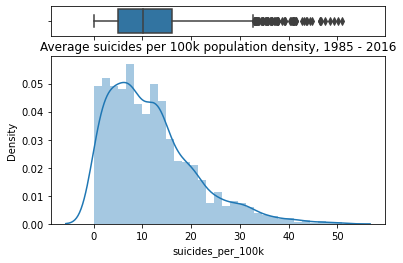

In [19]:
#density plot
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)});
# Add a graph in each part
sns.boxplot(df_country["suicides_per_100k"], ax=ax_box);
sns.distplot(df_country["suicides_per_100k"], ax=ax_hist);
plt.title('Average suicides per 100k population density, 1985 - 2016');
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [20]:
countries_high_suicide = df_country.query('suicides_no > 6000 | suicides_per_100k > 31').country.unique()

#filtering data with high suicide rates to investigate a little bit further
high_suicide_countries_stats = df_country[df_country['country'].isin(countries_high_suicide)]
high_suicide_countries_stats

,country,year,population,suicides_no,suicides_per_100k
266,Belarus,1990,9408800,2085,22.160105
267,Belarus,1991,9476200,2169,22.888922
268,Belarus,1992,9570900,2424,25.326772
269,Belarus,1993,9641100,2885,29.923971
270,Belarus,1994,9653900,3153,32.660376
...,...,...,...,...,...
2266,United States,2011,290313825,39508,13.608722
2267,United States,2012,292827128,40596,13.863470
2268,United States,2013,295322862,41143,13.931532
2269,United States,2014,297749735,42769,14.364077


In [21]:
len(countries_high_suicide)

20

Let's investigate data distribution for countries with high suicide rates.

### Countries with high suicide rates data distribution

On countries with high suicide rates - we ended up having more normally distributed data while still having one outlier being Lithuania.

According to Wiki, high suicide rate is a significant social issue in the country due to its high rate reaching its peak in 1995 year.

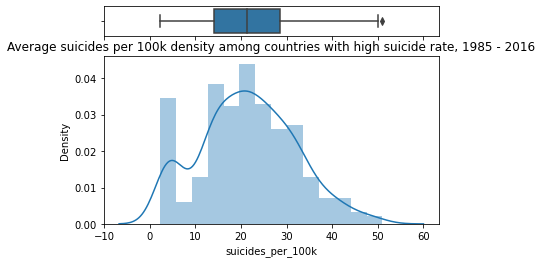

In [22]:
#density plot
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)});
plt.title('Average suicides per 100k density among countries with high suicide rate, 1985 - 2016');
# Add a graph in each part
sns.boxplot(high_suicide_countries_stats["suicides_per_100k"], ax=ax_box);
sns.distplot(high_suicide_countries_stats["suicides_per_100k"], ax=ax_hist);
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [23]:
high_suicide_countries_stats.query('suicides_per_100k > 50')

,country,year,population,suicides_no,suicides_per_100k
1255,Lithuania,1995,3387149,1694,50.012562
1256,Lithuania,1996,3375163,1722,51.019758


In [24]:
df.head()

,country,year,sex,age,suicides_no,population,suicidesper100kpop,country-year,HDI for year,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [25]:
#Final wrangling before bivariate exploration
countries_gdp = df.iloc[:,[0,1,8,9,10]].groupby(by=['country', 'year']).mean().reset_index()

#joining two datasets together for further investigation

df_fin = pd.merge(countries_gdp, df_country)
df_fin

,country,year,HDI for year,gdp_for_year_dollars,gdp_per_capita_dollars,population,suicides_no,suicides_per_100k
0,Albania,1987,NaN,2156624900,796,2709600,73,2.694125
1,Albania,1988,NaN,2126000000,769,2764300,63,2.279058
2,Albania,1989,NaN,2335124988,833,2803100,68,2.425886
3,Albania,1992,NaN,709452584,251,2822500,47,1.665190
4,Albania,1993,NaN,1228071038,437,2807300,73,2.600363
...,...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,0.655,39332770929,1533,25651783,1464,5.707206
2317,Uzbekistan,2011,0.661,45915191189,1767,25978049,1640,6.313022
2318,Uzbekistan,2012,0.668,51821573338,1964,26381830,1835,6.955545
2319,Uzbekistan,2013,0.672,57690453461,2150,26838924,1950,7.265567


In [26]:
#Categorizing countries by low/moderate/high/extreme suicide rates
df_fin['suicide_rates'] = pd.cut(df_fin['suicides_per_100k'], 5, labels=['extra-low','low','moderate','high','extreme'])

The dataset now is categorised based on suicides per 100k. Let's jump to bivariate exploration.

## Bivariate Exploration

### Worldwide suicide rate - average view

As we can see from here, the average worldwide suicide rates been climbing up constantly to reach peak between 1195 to 1997, followed by a gradual decrease in rates until 2015. However, after they spiked again in 2016!

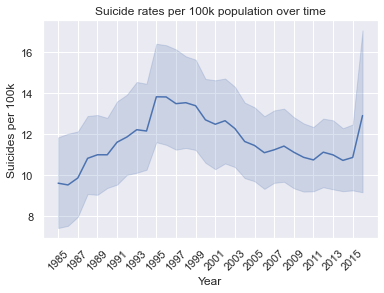

In [27]:
#look at how mean suicide rates been changing over time
sns.set_theme(style='darkgrid')
ax = sns.lineplot(x = 'year', y='suicides_per_100k', data = df_fin);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

Let's investigate potential dependencies / correlations between suicide rates and other factors including population, country GDP, GDP per capita and human development index wherever it is possible.

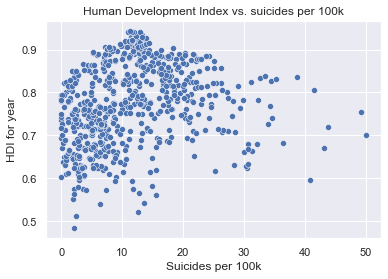

In [28]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'HDI for year');
plt.title('Human Development Index vs. suicides per 100k');
plt.xlabel('Suicides per 100k');

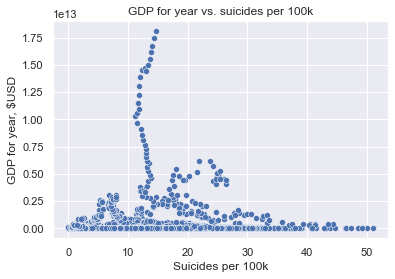

In [29]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'gdp_for_year_dollars');
plt.title('GDP for year vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('GDP for year, $USD');

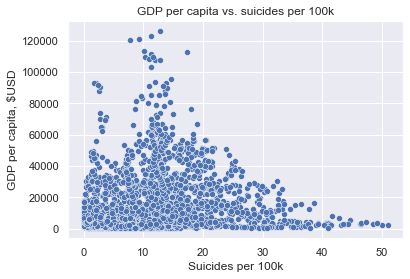

In [30]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'gdp_per_capita_dollars');
plt.title('GDP per capita vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('GDP per capita, $USD');

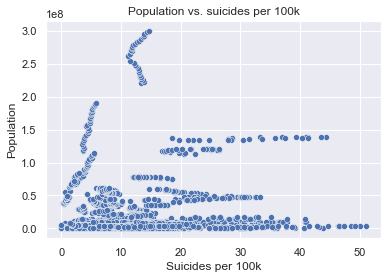

In [31]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'population');
plt.title('Population vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('Population');

### Correlation of suicide rates per 100k vs. other factors

Based on the correlation matrix, there is nothing we can strongly associate with the plot.

A few mild/strong positive correlation points were discovered based between time variable and human development index, as well as GDP growth (good news). However, it is interesting to observe only a slight/weak correlation between gdp per capita and country gdp. That means that it is unlikely that if the country is producing more GDP, its households will get much richer.

Let's have a look into what's going on within the ratio of countries with different suicide rates over time.

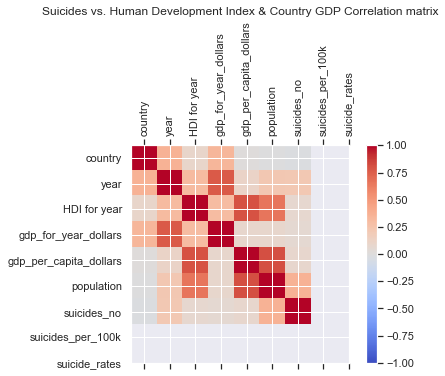

In [32]:
#correlation matrix
corr = df_fin.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_fin.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_fin.columns)
ax.set_yticklabels(df_fin.columns)
plt.title('Suicides vs. Human Development Index & Country GDP Correlation matrix');
plt.show()

We can see from the chart, that period 1996-2001 there was way higher number of countries with high suicide rates. As the world moves on, more countries are shifting from extreme cohorts towards lower cohort.

However, in the meantime, extra-low segment shows almost no improvement at all, what can set good targets in the future.

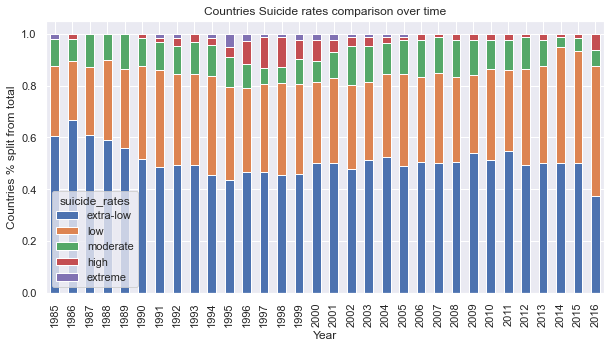

In [33]:
df_suicide = df_fin.groupby(['year','suicide_rates'])['country'].count().reset_index()
df_suicide = df_suicide.pivot(index = 'year', columns = 'suicide_rates', values = 'country')
df_suicide = df_suicide.div(df_suicide.sum(axis=1),axis=0);
sr = df_suicide.plot.bar(stacked = True, figsize = (10,5));
sr.set(xlabel = 'Year', ylabel = 'Countries % split from total');
plt.title('Countries Suicide rates comparison over time');

## Multivariate Exploration


In this section, I want to put more focus to understand the relationship between countries with different suicide rates and key life characteristics, as well as to understand if high suicide rates are driven by a particular group/generation of people.

##### Men tend to commit suicide more often, than women.

First of all, males tend to be more vulnerable group than females, as their suicide rates per 100k population is many times higher than females. That pattern is observed among all age groups, and observed consistently over the course of the given time period from 1985 to 2015.


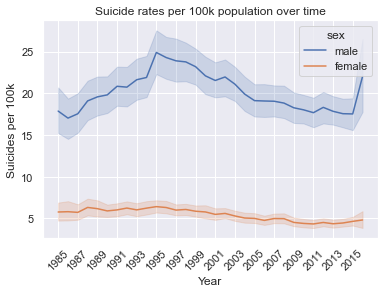

In [34]:
sns.set_theme(style='darkgrid')
ax = sns.lineplot(x = 'year', y='suicidesper100kpop', hue = 'sex', data = df);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

#### WWII Generation reported highest suicide rates than everyone else

Based on the chart, G.I. Generation as well as Silent one tend to have the highest suicide rates per history.

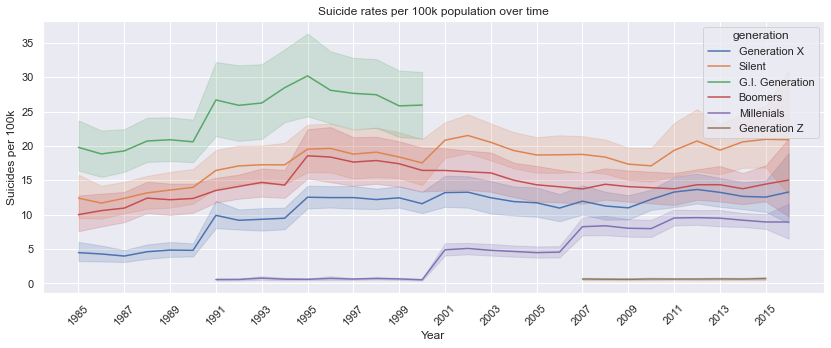

In [35]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(14,5))
ax = sns.lineplot(x = 'year', y='suicidesper100kpop', hue = 'generation', data = df);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

#### Higher suicide rate for G.I. Generation is similar across both females and males.

Based on the chart, the trend is similar across both males and females.

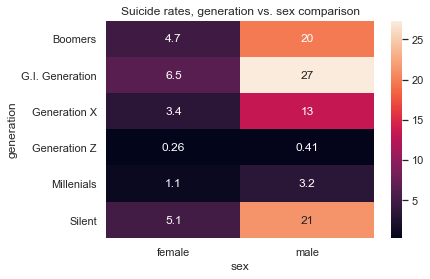

In [36]:
suicide_per_generation = df.pivot_table(values='suicidesper100kpop', index = 'generation', columns = 'sex', aggfunc = np.median)
sns.heatmap(suicide_per_generation, annot = True);
plt.title('Suicide rates, generation vs. sex comparison');
plt.show()

##### The older the person, the higher the suicide rate is.

Another interesting discovery was done based on the age. The older the group, the higher suicide rate per 100k population is. This trend is consistent across sex, and probably partially driven by decrease of the size of the group, as well as increased number of suicides. 

It is alarming considering that planet population is getting older in general.

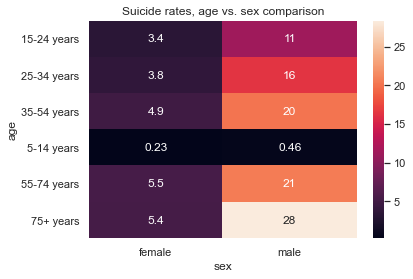

In [37]:
suicide_per_gender = df.pivot_table(values='suicidesper100kpop', index = 'age', columns = 'sex', aggfunc = np.median)
sns.heatmap(suicide_per_gender, annot = True);
plt.title('Suicide rates, age vs. sex comparison');
plt.show()

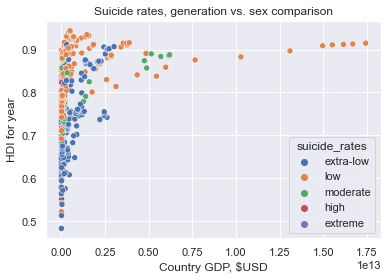

In [38]:
sns.scatterplot(data = df_fin, x = 'gdp_for_year_dollars', y = 'HDI for year', hue = 'suicide_rates');
plt.title('Suicide rates, generation vs. sex comparison');
plt.xlabel('Country GDP, $USD');

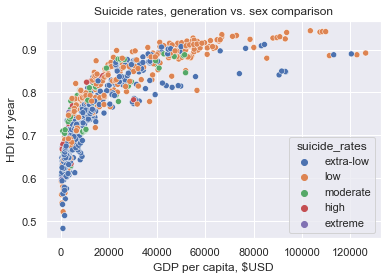

In [39]:
sns.scatterplot(data = df_fin, x = 'gdp_per_capita_dollars', y = 'HDI for year', hue = 'suicide_rates');
plt.title('Suicide rates, generation vs. sex comparison');
plt.xlabel('GDP per capita, $USD');

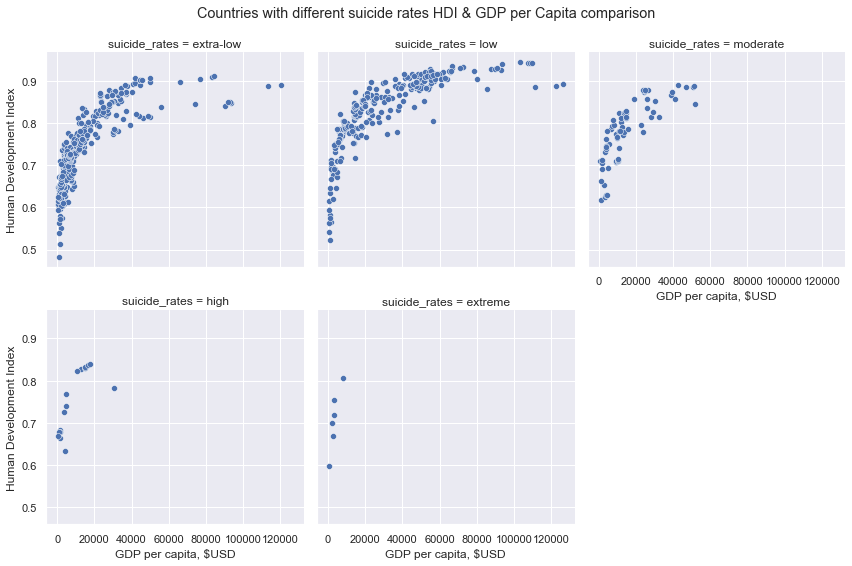

In [40]:
g = sns.FacetGrid(df_fin, col = 'suicide_rates',height=4, aspect= 1, col_wrap = 3);
g.map(sns.scatterplot,'gdp_per_capita_dollars', 'HDI for year');
g.set_axis_labels('GDP per capita, $USD', 'Human Development Index');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Countries with different suicide rates HDI & GDP per Capita comparison');

##### Almost all countries with high and extreme suicide rates are sitting within countries with low GDP and GDP per capita.

After additional segmentation it was discovered that pretty much all countries with high and extreme suicide rates per 100k population are coming from countries with low GDP & GDP per capita. Therefore, less lucky countries that are more economically vulnerable are prone to population suicide.

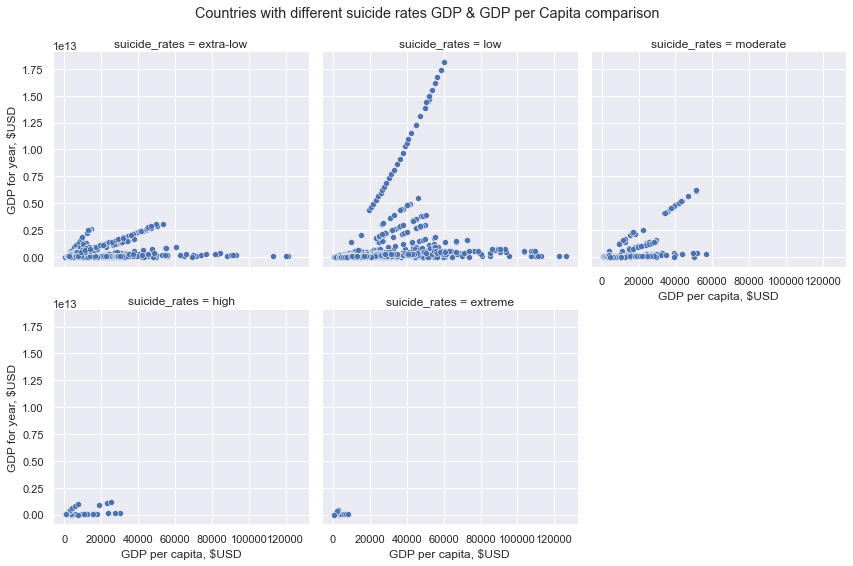

In [41]:
g = sns.FacetGrid(df_fin, col = 'suicide_rates',height=4, aspect= 1, col_wrap = 3);
g.map(sns.scatterplot,'gdp_per_capita_dollars', 'gdp_for_year_dollars');
g.set_axis_labels('GDP per capita, $USD', 'GDP for year, $USD');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Countries with different suicide rates GDP & GDP per Capita comparison');

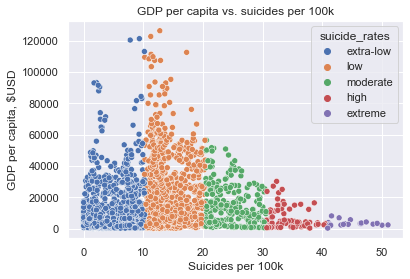

In [42]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'gdp_per_capita_dollars', hue = 'suicide_rates');
plt.title('GDP per capita vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('GDP per capita, $USD');

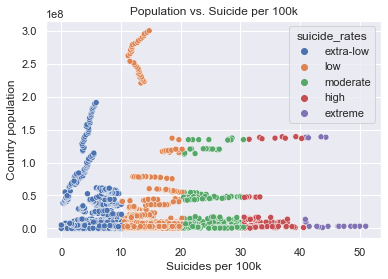

In [43]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'population', hue = 'suicide_rates');
plt.xlabel('Suicides per 100k');
plt.title('Population vs. Suicide per 100k');
plt.ylabel('Country population');

### Conclusion

During the analysis, a few interesting dependancies were discovered.

##### Men tend to commit suicide more often, than women.

First of all, males tend to be more vulnerable group than females, as their suicide rates per 100k population is many times higher than females. That pattern is observed among all age groups, and observed consistently over the course of the given time period from 1985 to 2015.

##### The older the person, the higher the suicide rate is.

Another interesting discovery was done based on the age. The older the group, the higher suicide rate per 100k population is. This trend is consistent across sex, and probably partially driven by decrease of the size of the group, as well as increased number of suicides. 

It is alarming considering that planet population is getting older in general.

##### Almost all countries with high and extreme suicide rates are sitting within countries with low GDP and GDP per capita.

After additional segmentation it was discovered that pretty much all countries with high and extreme suicide rates per 100k population are coming from countries with low GDP & GDP per capita. Therefore, less lucky countries that are more economically vulnerable are prone to population suicide.

In [ ]:
!jupyter nbconvert slides.ipynb --to slides --post serve

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] Writing 1024706 bytes to slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slides.slides.html
Use Control-C to stop this server
